In [62]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
from pandas import read_csv
from datetime import datetime
from IPython.display import Image, HTML

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler  
from sklearn.compose import make_column_transformer 
from sklearn.metrics import r2_score

import arcgis
from arcgis.gis import GIS
from arcgis.learn import FullyConnectedNetwork, MLModel, prepare_tabulardata

import arcpy
from arcpy import env
from arcgis.features import GeoAccessor

import pandas as pd

In [63]:
env.workspace = "C:\Data\Ziel3_final.gdb"

In [64]:
datasetList = arcpy.ListTables("*")
datasetList

['Ziel3_final_mit_SepOkt']

In [65]:
df = pd.DataFrame.spatial.from_table(datasetList[0])
df

,OBJECTID,RS,AGS,Dürreindex,Bodenfeuchte,Niederschlag,Sonnenscheindauer,Temperatur_maximal,Temperatur_minimal,Temperatur_Durchschnitt,Bodenfeuchte_Durchschnitt,Dürre_Durchschnitt,Niederschlag_Durchschnitt,Sonnendauer_Durchschnitt,Temperatur_max_Durchschnitt,Temperatur_mean_Durchschnitt,Temperatur_min_Durchschnitt,Zeit_Converted
0,1,010010000000,01001000,2.020833,102.916667,36.562500,44.916667,5.035417,0.770833,3.091667,105.916667,6.645833,83.895833,41.104167,3.835417,2.027083,-0.233333,1992-01-01
1,2,010020000000,01002000,2.009091,103.000000,33.200000,48.527273,4.987273,-0.047273,2.597273,104.990909,5.809091,71.781818,40.636364,3.950000,1.920909,-0.414545,1992-01-01
2,3,010030000000,01003000,2.000000,102.000000,30.729167,44.588542,4.676042,-0.489583,2.119271,103.817708,4.994792,60.390625,42.359375,3.797917,1.602083,-0.967708,1992-01-01
3,4,010040000000,01004000,2.357143,103.000000,37.442857,47.928571,4.974286,-0.007143,2.565714,104.957143,6.000000,77.028571,42.928571,3.972857,1.888571,-0.498571,1992-01-01
4,5,010510011011,01051011,2.638298,103.000000,38.063830,49.000000,4.800000,0.200000,2.585106,105.000000,5.978723,72.617021,46.000000,4.102128,2.027660,-0.270213,1992-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4162465,4162865,130755552139,13075139,0.000000,57.250000,14.000000,150.000000,16.800000,8.000000,12.200000,70.000000,1.000000,45.000000,109.000000,13.200000,9.600000,6.000000,2022-10-01
4162466,4162866,130755553020,13075020,0.000000,59.285714,12.000000,149.000000,16.750000,7.750000,12.200000,71.000000,2.000000,47.500000,109.000000,13.200000,9.500000,5.900000,2022-10-01
4162467,4162868,130755557018,13075018,0.000000,63.000000,13.000000,144.000000,16.400000,8.200000,12.200000,74.000000,2.000000,50.000000,111.000000,13.100000,9.600000,6.300000,2022-10-01
4162468,4162869,130755557069,13075069,0.000000,61.000000,12.000000,151.000000,16.400000,6.600000,11.700000,73.000000,2.000000,50.000000,111.000000,13.100000,9.500000,5.900000,2022-10-01


In [146]:
# add a column for Year
df['AGSNRW'] = df['AGS'].str.slice(0, 2)
dfnrw = df.loc[df['AGSNRW'] == "05" ]
dfnrw


,OBJECTID,RS,AGS,Dürreindex,Bodenfeuchte,Niederschlag,Sonnenscheindauer,Temperatur_maximal,Temperatur_minimal,Temperatur_Durchschnitt,Bodenfeuchte_Durchschnitt,Dürre_Durchschnitt,Niederschlag_Durchschnitt,Sonnendauer_Durchschnitt,Temperatur_max_Durchschnitt,Temperatur_mean_Durchschnitt,Temperatur_min_Durchschnitt,Zeit_Converted,AGSNRW
2076,2077,051110000000,05111000,2.119266,103.000000,33.330275,52.527523,5.495413,0.491284,2.951835,104.082569,5.133028,67.908257,53.756881,5.984404,3.427982,0.734404,1992-01-01,05
2077,2078,051120000000,05112000,1.271186,103.000000,25.237288,53.118644,5.370339,0.863983,3.086864,104.008475,5.000000,67.135593,52.957627,6.036441,3.625000,1.171186,1992-01-01,05
2078,2079,051130000000,05113000,2.115741,103.032558,32.754630,52.949074,5.019444,0.390741,2.683333,104.625000,5.907407,78.430556,53.027778,5.582407,3.229167,0.819444,1992-01-01,05
2079,2080,051140000000,05114000,1.657143,103.000000,26.478571,52.628571,5.250000,0.610714,2.820714,104.000000,5.000000,64.371429,54.021429,6.000000,3.435714,0.900000,1992-01-01,05
2080,2081,051160000000,05116000,2.000000,103.000000,30.575581,51.122093,5.148837,0.233721,2.636047,104.145349,4.941860,61.313953,55.122093,5.852326,3.119186,0.729651,1992-01-01,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4153689,4154052,059780024024,05978024,1.000000,78.385965,27.140351,141.105263,18.712281,7.975439,13.300000,86.228070,3.000000,67.508772,103.543860,14.857895,10.700000,7.040351,2022-10-01,05
4153690,4154053,059780028028,05978028,1.000000,82.293103,35.844828,137.741379,18.153448,8.243103,13.198276,87.706897,3.258621,73.844828,102.068966,14.463793,10.341379,6.822414,2022-10-01,05
4153691,4154054,059780032032,05978032,0.766667,78.800000,25.400000,143.150000,18.516667,8.065000,13.291667,87.083333,3.000000,68.816667,104.600000,14.718333,10.590000,6.976667,2022-10-01,05
4153692,4154055,059780036036,05978036,0.954545,80.386364,28.704545,142.840909,18.503409,8.217045,13.421591,86.454545,3.034091,68.488636,104.170455,14.560227,10.440909,6.813636,2022-10-01,05


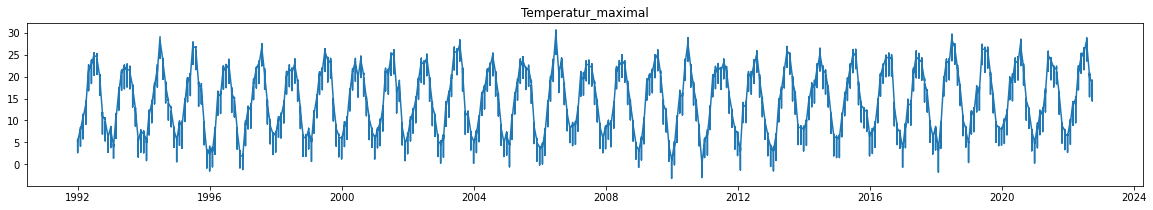

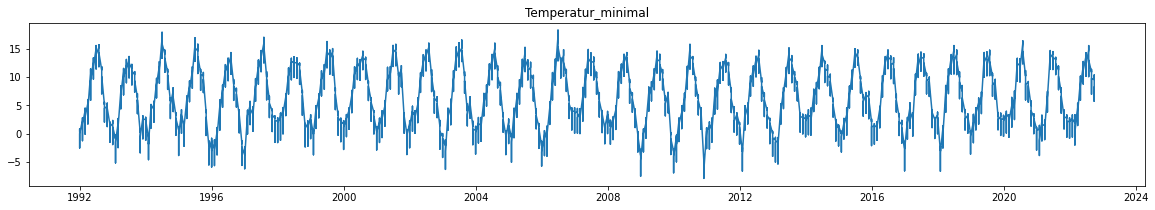

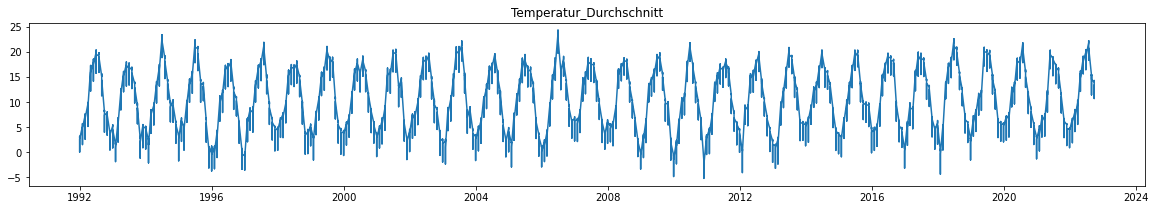

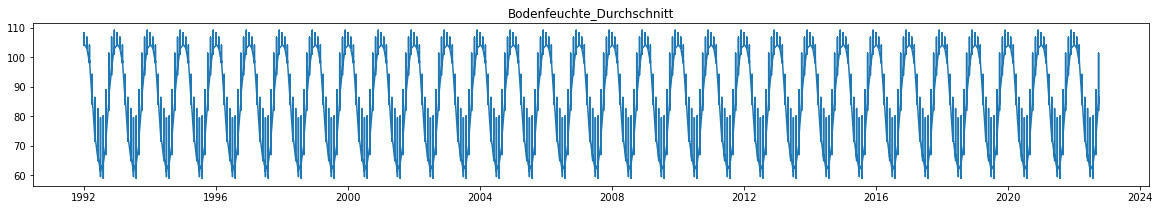

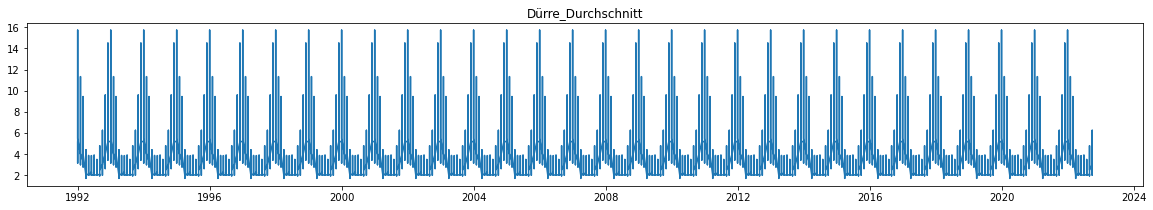

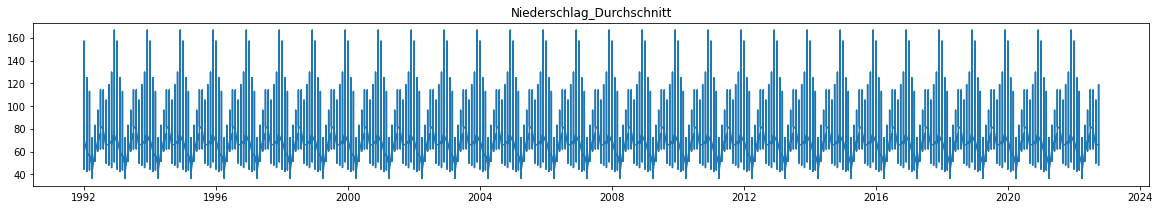

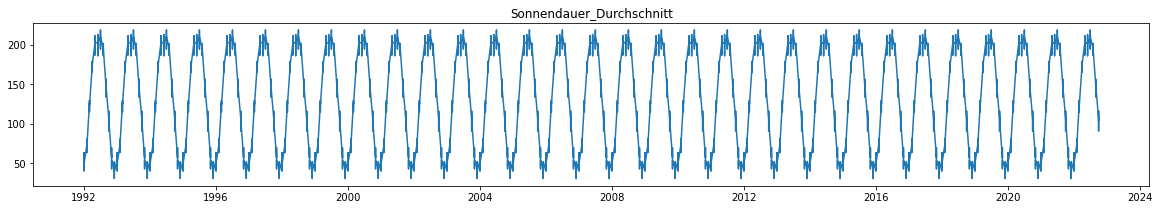

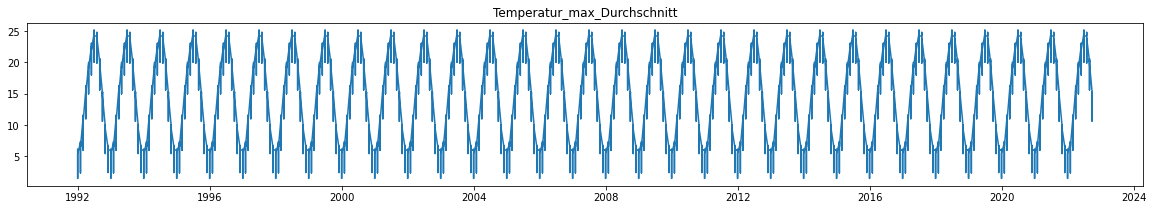

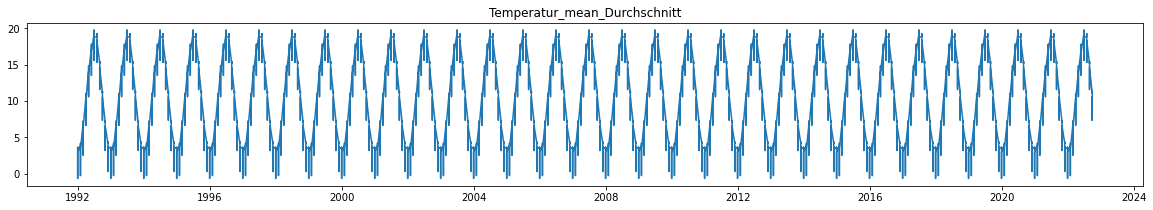

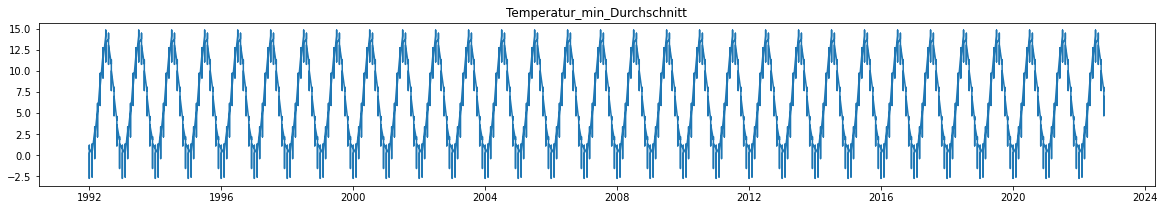

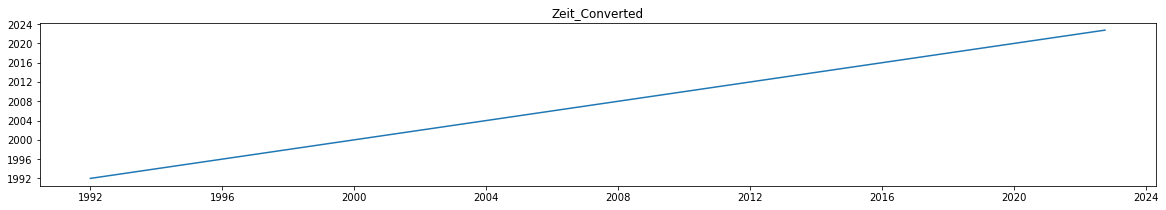

In [147]:
# plot and Visualize the variables from the training set for one solar station - Hillhurst Sunnyside Community Association 
Temp = dfnrw.set_index(dfnrw['Zeit_Converted'])
Temp = Temp.sort_index() 
for i in range(7,Temp.shape[1]-1):
        plt.figure(figsize=(20,3))
        plt.title(Temp.columns[i])
        plt.plot(Temp[Temp.columns[i]])
        plt.show()

In [150]:
gis = GIS('home')

In [151]:
#Subset for Test and Training
test = df.loc[df['AGS'] == "13075069"]
test

,OBJECTID,RS,AGS,Dürreindex,Bodenfeuchte,Niederschlag,Sonnenscheindauer,Temperatur_maximal,Temperatur_minimal,Temperatur_Durchschnitt,Bodenfeuchte_Durchschnitt,Dürre_Durchschnitt,Niederschlag_Durchschnitt,Sonnendauer_Durchschnitt,Temperatur_max_Durchschnitt,Temperatur_mean_Durchschnitt,Temperatur_min_Durchschnitt,Zeit_Converted,AGSNRW
9539,9540,130755557069,13075069,2.000000,96.235294,28.352941,68.764706,3.835294,-1.435294,1.417647,101.176471,4.0,46.705882,48.764706,3.088235,0.935294,-1.523529,1992-01-01,13
11248,11249,130755557069,13075069,2.000000,96.000000,28.000000,72.000000,3.800000,-1.500000,1.400000,101.000000,4.0,46.000000,49.000000,3.100000,0.900000,-1.600000,1992-01-01,13
20789,20790,130755557069,13075069,1.941176,98.000000,28.705882,47.647059,5.958824,0.594118,3.323529,102.000000,3.0,37.352941,68.588235,3.976471,1.388235,-1.370588,1992-02-01,13
22498,22499,130755557069,13075069,2.000000,98.000000,27.000000,50.000000,6.000000,0.500000,3.300000,102.000000,3.0,37.000000,69.000000,4.100000,1.400000,-1.500000,1992-02-01,13
32039,32040,130755557069,13075069,4.588235,98.176471,73.882353,118.352941,8.352941,1.694118,4.658824,98.000000,3.0,38.529412,130.529412,7.188235,3.635294,0.211765,1992-03-01,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4139974,4140295,130755557069,13075069,1.000000,44.000000,51.000000,252.000000,24.200000,14.100000,19.800000,57.000000,2.0,62.000000,226.000000,22.800000,17.900000,13.100000,2022-08-01,13
4149514,4149838,130755557069,13075069,1.117647,59.833333,40.882353,186.647059,17.811765,8.576471,13.335294,64.294118,2.0,54.352941,167.000000,18.470588,14.205882,10.158824,2022-09-01,13
4151221,4151582,130755557069,13075069,1.000000,59.000000,37.000000,187.000000,17.900000,8.100000,13.200000,64.000000,2.0,54.000000,167.000000,18.600000,14.200000,9.900000,2022-09-01,13
4160761,4161125,130755557069,13075069,0.000000,61.388889,13.176471,150.352941,16.258824,7.129412,11.864706,73.470588,2.0,50.588235,111.705882,13.023529,9.570588,6.105882,2022-10-01,13


In [152]:
# Here a list is created naming all fields containing the predictors from the input feature layer
X = ['Bodenfeuchte','Dürreindex','Sonnenscheindauer','Temperatur_maximal','Temperatur_minimal']

In [153]:
# importing the libraries from arcgis.learn for data preprocessing
from arcgis.learn import prepare_tabulardata

In [154]:
# precrocessing data using prepare data method - it handles imputing missing values, normalization and train-test split
data = prepare_tabulardata(dfnrw,
                           'Niederschlag',
                           explanatory_variables=X)

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\learn\_utils\tabular_data.py:1364: UserWarning: Dataframe is not spatial, Rasters and distance layers will not work
  warnings.warn(


In [155]:
data

In [156]:
# visualizing the prepared data 
data.show_batch()

,Bodenfeuchte,Dürreindex,Niederschlag,Sonnenscheindauer,Temperatur_maximal,Temperatur_minimal
767229,61.864865,0.432432,24.027027,193.135135,20.983784,8.743243
1622232,107.000000,6.818182,95.272727,26.000000,5.233333,0.400000
2274850,99.726190,2.607143,47.750000,26.077381,7.619048,2.448810
3174690,47.500000,1.196078,56.117647,221.343137,25.632353,13.525490
3264594,97.938144,2.103093,41.917526,105.773196,9.549485,1.304124


In [157]:
# importing the model from arcgis.learn
from arcgis.learn import FullyConnectedNetwork

In [158]:
# Initialize the model with the data where the weights are randomly allocated
fcn = FullyConnectedNetwork(data)

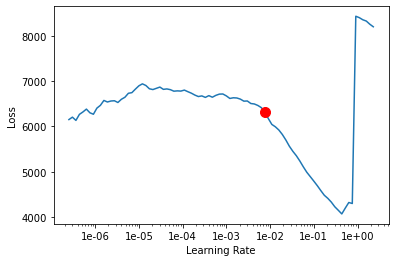

0.007585775750291836

In [160]:
# searching for an optimal learning rate using the lr_find for passing it to the final model fitting 
l_rate = fcn.lr_find()
l_rate

In [161]:
# the model is trained for 100 epochs 
fcn.fit(100,lr=l_rate,early_stopping=True,checkpoint=True)

epoch,train_loss,valid_loss,time
0,111.889030,40.067032,00:12
1,96.116554,32.812222,00:12
2,111.596649,42.823845,00:14
3,119.213303,35.809376,00:12
4,92.106476,30.645771,00:13
5,104.628258,28.995398,00:13
6,98.260513,22.989243,00:12
7,90.036324,22.883919,00:12
8,98.209785,32.135971,00:13
9,97.719162,30.069195,00:13


Epoch 13: early stopping


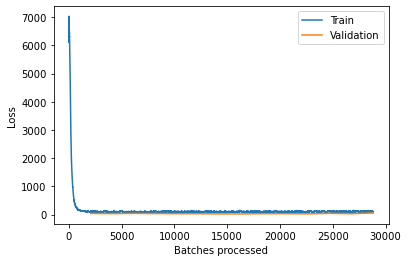

In [162]:
# the train vs valid losses is plotted to check quality of the trained model
fcn.plot_losses()

In [163]:
# the predicted values by the trained model is printed for the test set
fcn.show_results()

,Bodenfeuchte,Dürreindex,Niederschlag,Sonnenscheindauer,Temperatur_maximal,Temperatur_minimal,prediction_results
3152378,66.386905,1.011905,36.517857,174.404762,17.379762,5.444048,31.094862
2375861,58.121212,1.000000,48.545455,243.272727,23.984848,12.324242,40.519802
4018498,84.137500,2.925000,67.525000,104.437500,15.496250,7.230000,71.096329
958465,105.814815,9.629630,121.111111,51.925926,4.359259,-0.403704,117.725113
4041178,103.210526,6.815789,97.657895,33.763158,5.428947,1.181579,94.831062


In [164]:
# the model.score method from the tabular learner returns r-square
r_Square_fcn_test = fcn.score() 
print('r_Square_fcn_test: ', round(r_Square_fcn_test,5))

r_Square_fcn_test:  0.98562


In [166]:
# predicting using the predict function 
dwd_predicted = fcn.predict(test, output_layer_name='NS_prediction')

In [167]:
dwd_predicted

<Item title:"NS_prediction" type:Table Layer owner:alkr_esridech>

In [168]:
# Access & visualize the dataframe from the predicted layer 
pred_layer = dwd_predicted.tables
pred_layer


[<Table url:"https://services3.arcgis.com/JhD3NyxTJcNiae8J/arcgis/rest/services/NS_prediction/FeatureServer/0">]

In [169]:
dwdpredicted=dwd_predicted.tables[0].query().sdf
dwdpredicted

,OBJECTID,RS,AGS,Dürreindex,Bodenfeuchte,Niederschlag,Sonnenscheindauer,Temperatur_maximal,Temperatur_minimal,Temperatur_Durchschnitt,...,Dürre_Durchschnitt,Niederschlag_Durchschnitt,Sonnendauer_Durchschnitt,Temperatur_max_Durchschnitt,Temperatur_mean_Durchschnitt,Temperatur_min_Durchschnitt,Zeit_Converted,AGSNRW,prediction_results,FID
0,572040,130755557069,13075069,1.000000,97.000000,11.647059,133.000000,2.052941,-3.141176,-0.641176,...,3.000000,38.529412,130.529412,7.188235,3.635294,0.211765,1996-03-01,13,10.821826,1
1,1134540,130755557069,13075069,1.000000,64.000000,43.647059,306.647059,18.482353,8.188235,13.023529,...,2.000000,50.941176,249.588235,16.535294,12.094118,7.364706,2000-05-01,13,29.837570,2
2,573749,130755557069,13075069,1.000000,97.000000,12.000000,133.000000,2.100000,-3.100000,-0.600000,...,3.000000,38.000000,131.000000,7.300000,3.600000,0.100000,1996-03-01,13,10.891479,3
3,583290,130755557069,13075069,0.647059,81.058824,17.647059,222.352941,12.500000,2.041176,7.223529,...,1.470588,31.647059,203.352941,12.058824,7.723529,3.482353,1996-04-01,13,16.131489,4
4,1136249,130755557069,13075069,1.000000,64.000000,44.000000,306.000000,18.400000,8.200000,13.000000,...,2.000000,50.000000,249.000000,16.600000,12.100000,7.200000,2000-05-01,13,29.899920,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,2868749,130755557069,13075069,1.000000,99.000000,11.000000,161.000000,2.000000,-3.000000,-0.700000,...,3.000000,38.000000,131.000000,7.300000,3.600000,0.100000,2013-03-01,13,11.533685,736
736,2878290,130755557069,13075069,1.000000,88.000000,19.352941,200.411765,10.229412,3.188235,6.758824,...,1.470588,31.647059,203.352941,12.058824,7.723529,3.482353,2013-04-01,13,22.176540,737
737,2879999,130755557069,13075069,1.000000,88.000000,19.000000,202.000000,10.200000,3.200000,6.800000,...,2.000000,32.000000,203.000000,12.100000,7.700000,3.300000,2013-04-01,13,22.151808,738
738,2889540,130755557069,13075069,2.588235,68.235294,68.882353,221.705882,16.423529,8.976471,12.729412,...,2.000000,50.941176,249.588235,16.535294,12.094118,7.364706,2013-05-01,13,71.529388,739


<AxesSubplot:xlabel='Zeit_Converted'>

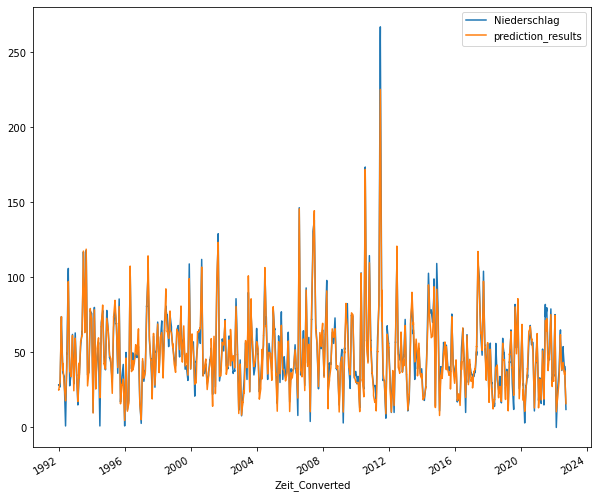

In [170]:
dwdpredicted.plot(x="Zeit_Converted", y=["Niederschlag","prediction_results" ], kind="line", figsize=(10, 9))